In [85]:
# MEAN , VARIANCE CALCULATOR
data = [12, 15, 18, 20, 25]

# Calculate Mean (Average)
mean = sum(data) / len(data)

# Calculate Variance
squared_diff = [(x - mean) ** 2 for x in data]
variance = sum(squared_diff) / len(data)

# Calculate Standard Deviation
std_deviation = variance ** 0.5

# Displaying results
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_deviation}")


Mean: 18.0
Variance: 19.6
Standard Deviation: 4.427188724235731


Demographic Data Analyzer

In [86]:
import pandas as pd

# Load the dataset
data = pd.read_csv('5.csv')  # Replace 'your_dataset.csv' with your dataset file

# Displaying the dataset header to understand its structure
print(data.head())

# 1. How many rows are in the dataset?
total_rows = data.shape[0]
print(f"\nTotal number of rows: {total_rows}")

# 2. How many columns are in the dataset?
total_columns = data.shape[1]
print(f"Total number of columns: {total_columns}")

# 3. What are the unique values in a specific column (e.g., 'sex')?
unique_sex = data['sex'].unique()
print(f"\nUnique values in 'sex': {unique_sex}")

# 4. How many people of each sex are in the dataset?
sex_counts = data['sex'].value_counts()
print(f"\nCounts of each sex:\n{sex_counts}")

# 5. What is the average age of the dataset?
average_age = data['age'].mean()
print(f"\nAverage age: {average_age:.2f}")

# 6. What are the mean, median, and standard deviation of age for each sex?
age_stats_by_sex = data.groupby('sex')['age'].agg(['mean', 'median', 'std'])
print("\nage statistics by sex:")
print(age_stats_by_sex)


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0             

Medical Data Visualizer

C:\Users\debna\AppData\Local\Temp\ipykernel_3472\1016271390.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


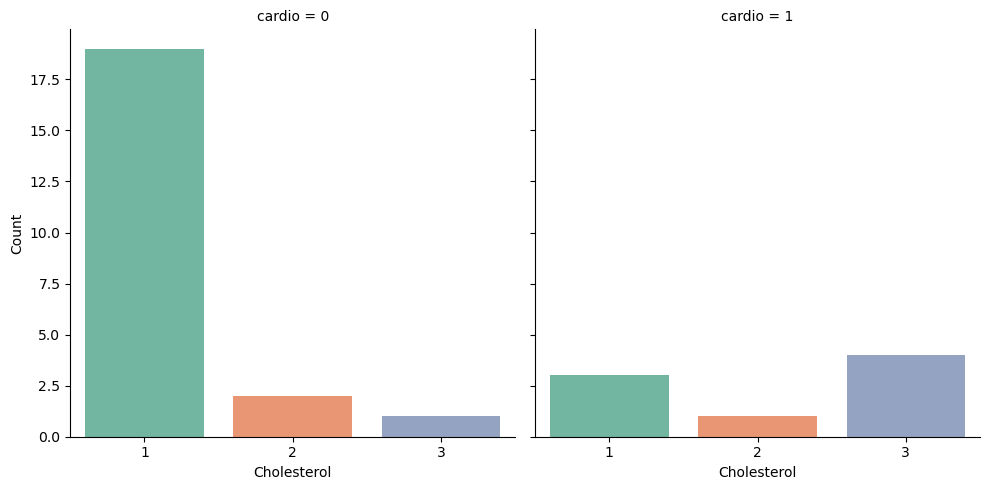

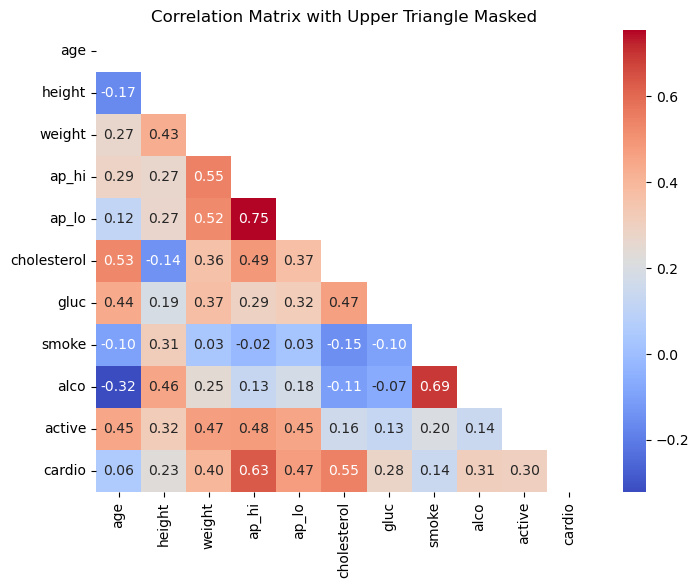

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('6.csv')  # Replace 'your_dataset.csv' with your CSV file path

# Creating separate count plots for each 'Cardio' value
g = sns.catplot(x="cholesterol", kind="count", col="cardio", data=data, palette="Set2")
g.set_axis_labels("Cholesterol", "Count")

# Creating the correlation matrix
corr_matrix = data.corr()

# Masking the upper triangle for the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plotting the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix with Upper Triangle Masked')
plt.show()


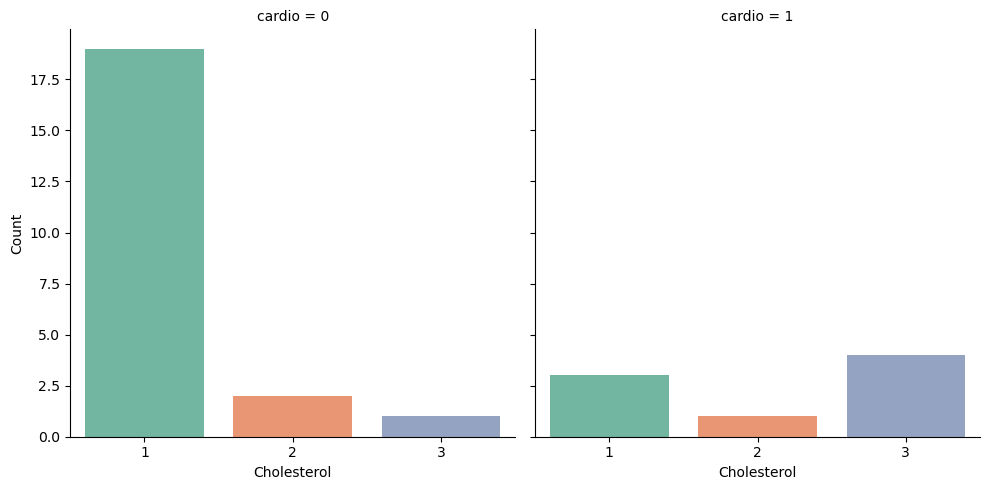

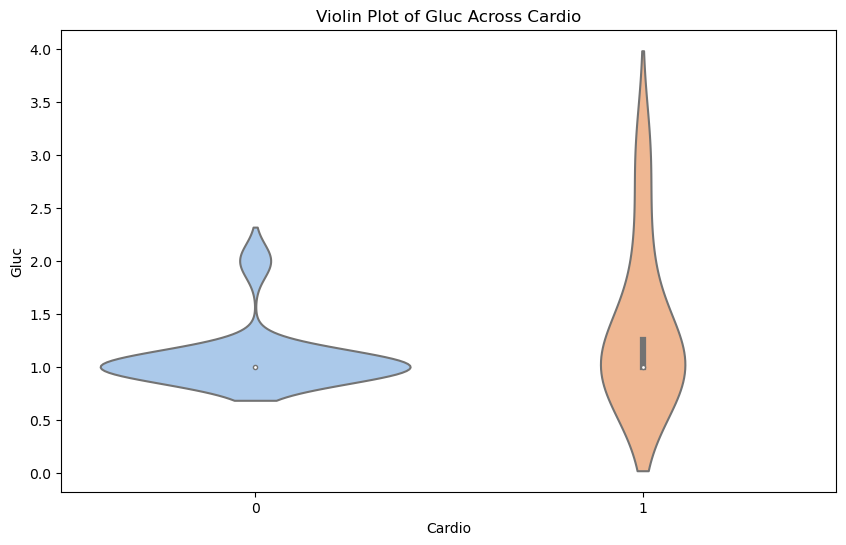

C:\Users\debna\AppData\Local\Temp\ipykernel_3472\2455286522.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


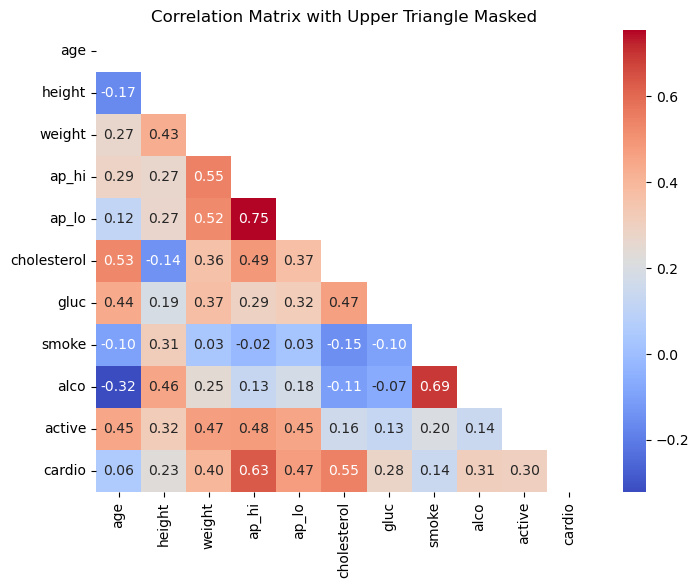

In [88]:

# Load the dataset
data = pd.read_csv('6.csv')

# Creating separate count plots for each 'Cardio' value
g = sns.catplot(x="cholesterol", kind="count", col="cardio", data=data, palette="Set2")
g.set_axis_labels("Cholesterol", "Count")

# Adding violin plot for 'Gluc' across 'Cardio'
plt.figure(figsize=(10, 6))
sns.violinplot(x='cardio', y='gluc', data=data, palette='pastel')
plt.title('Violin Plot of Gluc Across Cardio')
plt.xlabel('Cardio')
plt.ylabel('Gluc')
plt.show()

# Creating the correlation matrix
corr_matrix = data.corr()

# Masking the upper triangle for the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plotting the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix with Upper Triangle Masked')
plt.show()


Page View Time Series Visualizer

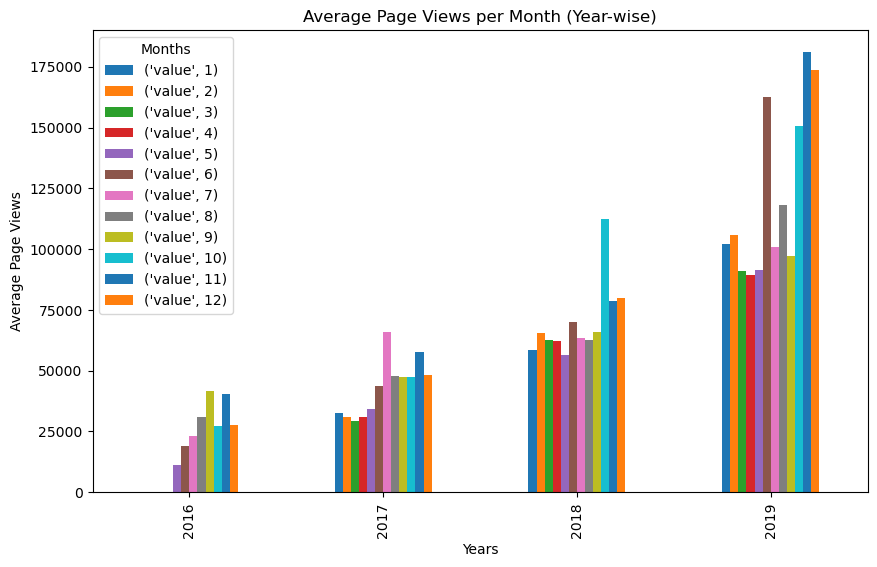

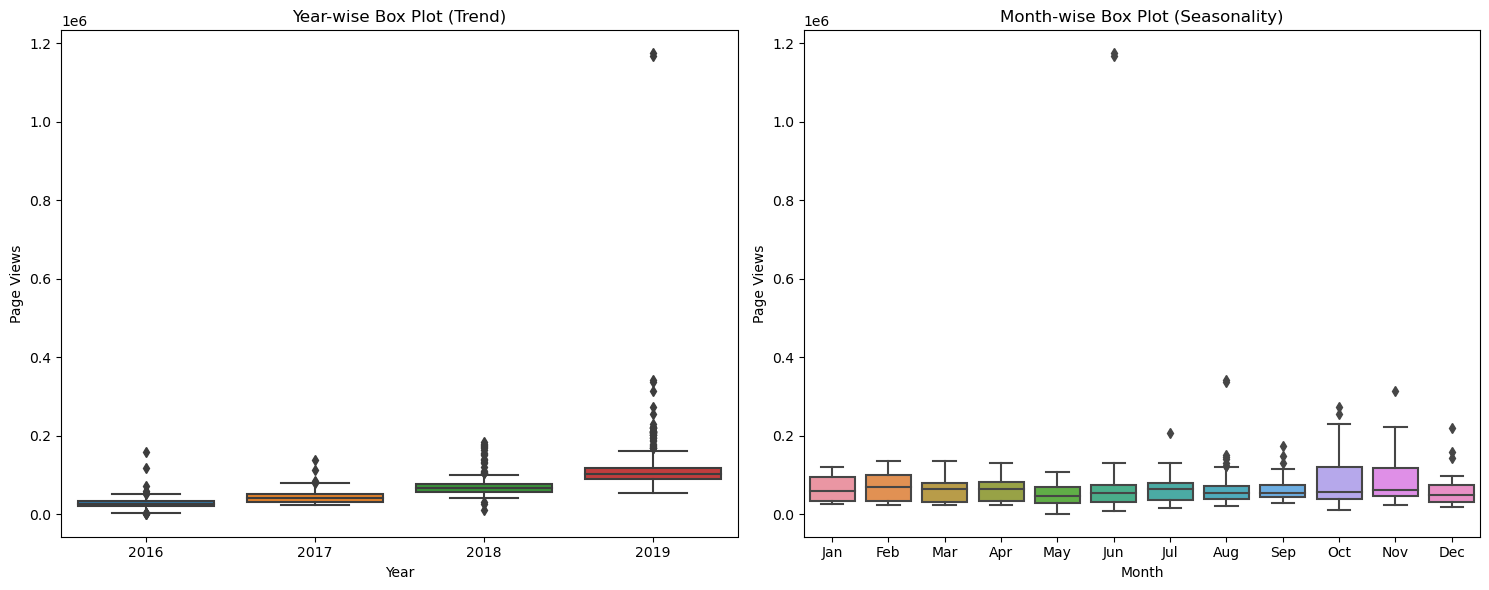

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Data processing for bar plot
df_bar = df.groupby([df.index.year, df.index.month]).mean().unstack()

# Data processing for box plots
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['month'] = df_box['date'].dt.strftime('%b')
df_box['year'] = df_box['date'].dt.year

# Draw bar plot
fig, ax = plt.subplots(figsize=(10, 6))
df_bar.plot(kind='bar', ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.set_title('Average Page Views per Month (Year-wise)')
ax.legend(title='Months', labels=[month[:3] for month in df_bar.columns])
plt.show()

# Draw box plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[0].set_title('Year-wise Box Plot (Trend)')

sns.boxplot(x='month', y='value', data=df_box, order=[
            'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
axes[1].set_title('Month-wise Box Plot (Seasonality)')

plt.tight_layout()
plt.show()


Sea Level Predictor

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('epa-sea-level.csv')  # Replace 'sea_level_data.csv' with your dataset file


In [91]:
data.isnull().sum()

Year                          0
CSIRO Adjusted Sea Level      1
Lower Error Bound             1
Upper Error Bound             1
NOAA Adjusted Sea Level     113
dtype: int64

In [92]:
data.dropna(subset=['CSIRO Adjusted Sea Level'], inplace=True)


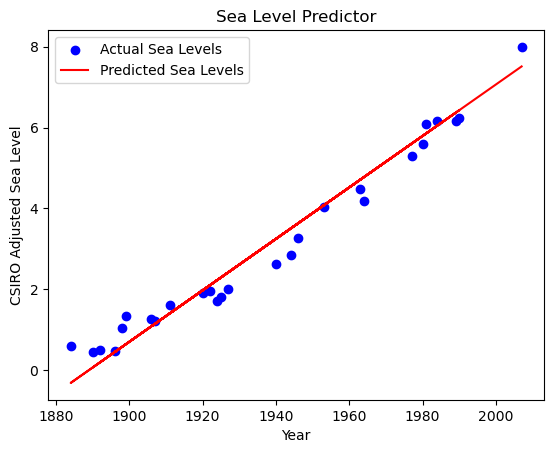

In [93]:

# Data preprocessing
X = data[['Year']]  # Features
y = data['CSIRO Adjusted Sea Level']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sea levels
y_pred = model.predict(X_test)

# Plotting the predicted sea levels
plt.scatter(X_test, y_test, color='blue', label='Actual Sea Levels')
plt.plot(X_test, y_pred, color='red', label='Predicted Sea Levels')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.title('Sea Level Predictor')
plt.legend()
plt.show()


In [94]:
model.predict([[1974]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.40977949])